##### 공공자료분석
    https://www.data.go.kr/dataset/15012005/fileData.do

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib as mpl
import matplotlib.font_manager as fm
mpl.rcParams['axes.unicode_minus']= False
path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname = path, size = 50).get_name()
plt.rc('font', family=font_name)

In [38]:
df=pd.read_csv('./data/상가업소정보_201912_01.csv',sep = '|')

df.head(2)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19905471,와라와라호프,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,1168010600106040000014378,대치상가,서울특별시 강남구 남부순환로 2933,135280,6280.0,NaN,1,NaN,127.061026,37.493922
1,19911397,커피빈코리아선릉로93길점,코리아선릉로93길점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1168010100106960042022041,NaN,서울특별시 강남구 선릉로93길 6,135080,6149.0,NaN,1,NaN,127.047883,37.505675


In [39]:
df.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [12]:
df.index

RangeIndex(start=0, stop=573680, step=1)

In [13]:
df.shape

(573680, 39)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573680 entries, 0 to 573679
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     573680 non-null  int64  
 1   상호명        573679 non-null  object 
 2   지점명        76674 non-null   object 
 3   상권업종대분류코드  573680 non-null  object 
 4   상권업종대분류명   573680 non-null  object 
 5   상권업종중분류코드  573680 non-null  object 
 6   상권업종중분류명   573680 non-null  object 
 7   상권업종소분류코드  573680 non-null  object 
 8   상권업종소분류명   573680 non-null  object 
 9   표준산업분류코드   539290 non-null  object 
 10  표준산업분류명    539290 non-null  object 
 11  시도코드       573680 non-null  int64  
 12  시도명        573680 non-null  object 
 13  시군구코드      573680 non-null  int64  
 14  시군구명       573680 non-null  object 
 15  행정동코드      573680 non-null  int64  
 16  행정동명       573680 non-null  object 
 17  법정동코드      573680 non-null  int64  
 18  법정동명       573680 non-null  object 
 19  지번코드       573680 non-n

In [14]:
df.isnull().sum()

상가업소번호            0
상호명               1
지점명          497006
상권업종대분류코드         0
상권업종대분류명          0
상권업종중분류코드         0
상권업종중분류명          0
상권업종소분류코드         0
상권업종소분류명          0
표준산업분류코드      34390
표준산업분류명       34390
시도코드              0
시도명               0
시군구코드             0
시군구명              0
행정동코드             0
행정동명              0
법정동코드             0
법정동명              0
지번코드              0
대지구분코드            0
대지구분명             0
지번본번지             0
지번부번지         98756
지번주소              0
도로명코드             0
도로명               0
건물본번지             0
건물부번지        501692
건물관리번호            0
건물명          308072
도로명주소             0
구우편번호             0
신우편번호             9
동정보          522824
층정보          226553
호정보          488414
경도                0
위도                0
dtype: int64

##### col별 null값 bar로 표시

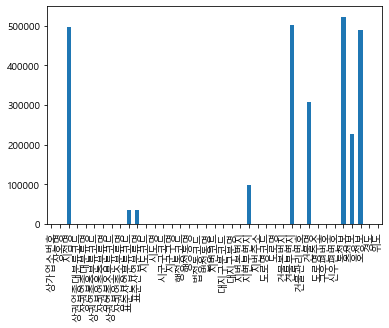

In [15]:
df.isnull().sum().plot(kind='bar')

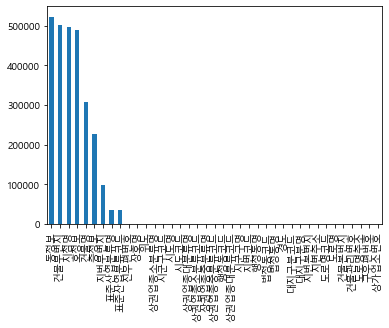

In [16]:
df.isnull().sum().sort_values(ascending=False).plot(kind='bar')

### conda prompt 활용

In [18]:
import missingno as msno

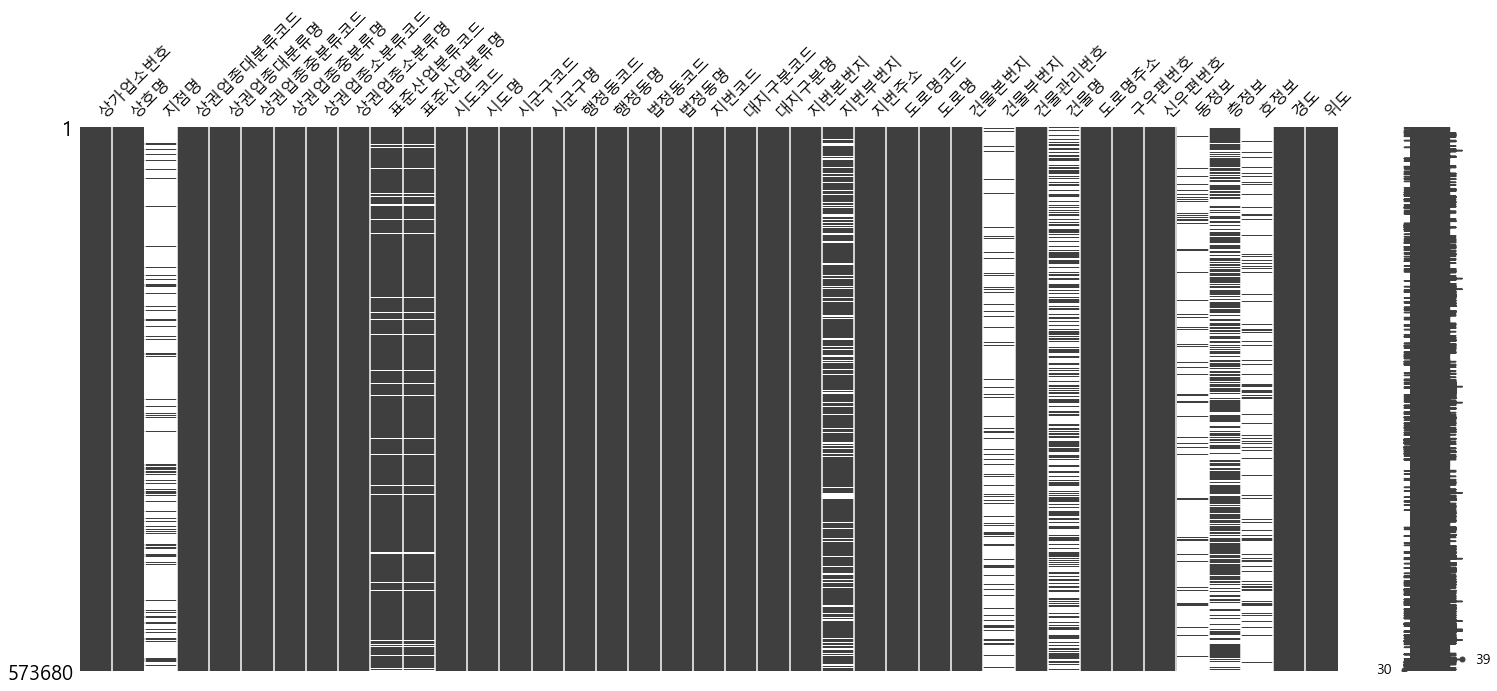

In [19]:
msno.matrix(df)

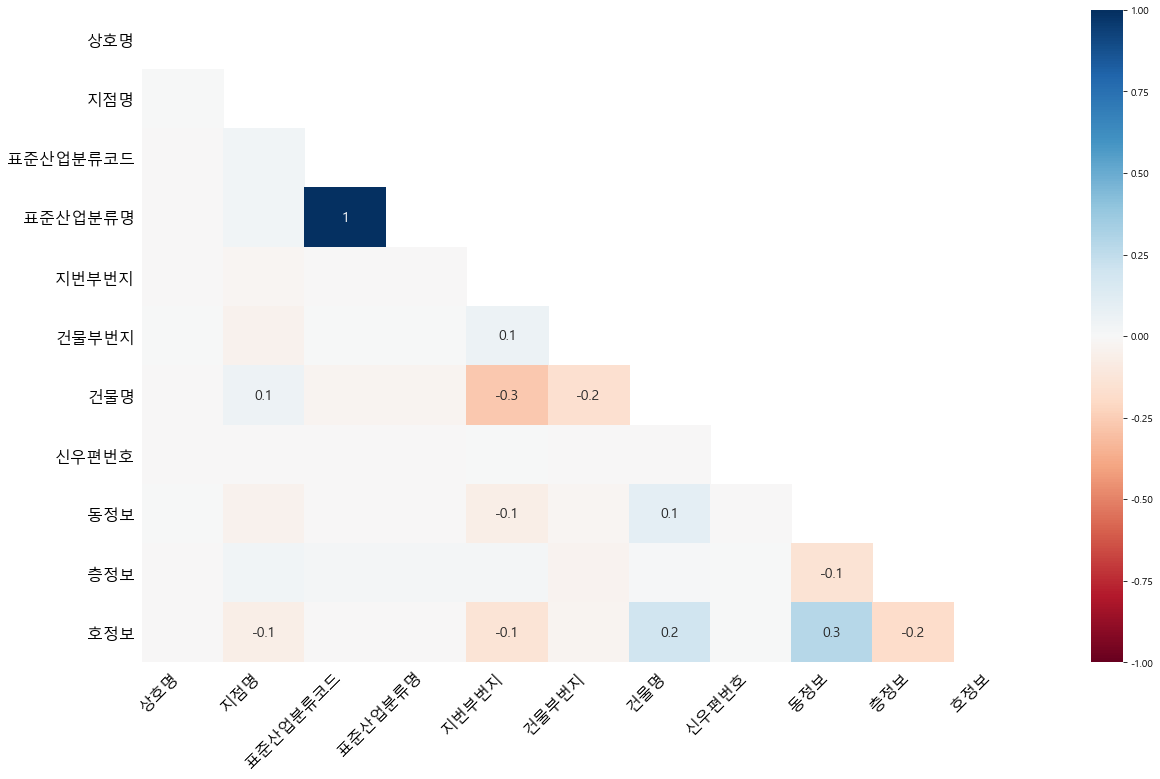

In [20]:
msno.heatmap(df)

In [40]:
del_col = df.isnull().sum().sort_values(ascending=False)[:9].index
del_col

Index(['동정보', '건물부번지', '지점명', '호정보', '건물명', '층정보', '지번부번지', '표준산업분류명',
       '표준산업분류코드'],
      dtype='object')

In [41]:
df = df.drop(del_col,axis=1)
df

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도코드,시도명,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
0,19905471,와라와라호프,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,11,서울특별시,...,서울특별시 강남구 대치동 604,116802000003,서울특별시 강남구 남부순환로,2933,1168010600106040000014378,서울특별시 강남구 남부순환로 2933,135280,6280.0,127.061026,37.493922
1,19911397,커피빈코리아선릉로93길점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,11,서울특별시,...,서울특별시 강남구 역삼동 696-42,116804166502,서울특별시 강남구 선릉로93길,6,1168010100106960042022041,서울특별시 강남구 선릉로93길 6,135080,6149.0,127.047883,37.505675
2,19911801,프로포즈,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,11,서울특별시,...,서울특별시 금천구 독산동 162-1,115453117003,서울특별시 금천구 가산로,34,1154510200101620001017748,서울특별시 금천구 가산로 34-6,153010,8545.0,126.899220,37.471711
3,19912201,싱싱커피&토스트,Q,음식,Q07,패스트푸드,Q07A10,토스트전문,26,부산광역시,...,부산광역시 사상구 괘법동 578,265303139004,부산광역시 사상구 괘감로,37,2653010400105780000002037,부산광역시 사상구 괘감로 37,617726,46977.0,128.980455,35.159774
4,19932756,가락사우나내스낵,F,생활서비스,F09,대중목욕탕/휴게,F09A02,사우나/증기탕/온천,11,서울특별시,...,서울특별시 송파구 석촌동 256,117103123001,서울특별시 송파구 가락로,71,1171010500102560005010490,서울특별시 송파구 가락로 71,138846,5690.0,127.104071,37.500249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573675,16394290,비파티세리공덕,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,11,서울특별시,...,서울특별시 마포구 공덕동 105-67,114404139142,서울특별시 마포구 마포대로14길,4,1144010200101050067001710,서울특별시 마포구 마포대로14길 4,121801,4211.0,126.955059,37.548618
573676,16336474,앤탑PC방,N,관광/여가/오락,N01,PC/오락/당구/볼링등,N01A01,인터넷PC방,11,서울특별시,...,서울특별시 성동구 성수동2가 289-15,112004109367,서울특별시 성동구 성수일로8길,37,1120011500102890015004255,서울특별시 성동구 성수일로8길 37,133834,4794.0,127.054615,37.545853
573677,16336218,오즈아레나PC방,N,관광/여가/오락,N01,PC/오락/당구/볼링등,N01A01,인터넷PC방,11,서울특별시,...,서울특별시 강남구 논현동 165-8,116802102001,서울특별시 강남구 강남대로,492,1168010800101650008000001,서울특별시 강남구 강남대로 492,135825,6119.0,127.024102,37.506202
573678,16335152,파인트리네일,F,생활서비스,F01,이/미용/건강,F01A02,발/네일케어,11,서울특별시,...,서울특별시 영등포구 여의도동 23,115603118002,서울특별시 영등포구 국제금융로,10,1156011000100230000000001,서울특별시 영등포구 국제금융로 10,150945,7326.0,126.924863,37.525172


In [43]:
df.head(1).columns

Index(['상가업소번호', '상호명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드', '상권업종중분류명',
       '상권업종소분류코드', '상권업종소분류명', '시도코드', '시도명', '시군구코드', '시군구명', '행정동코드',
       '행정동명', '법정동코드', '법정동명', '지번코드', '대지구분코드', '대지구분명', '지번본번지', '지번주소',
       '도로명코드', '도로명', '건물본번지', '건물관리번호', '도로명주소', '구우편번호', '신우편번호', '경도',
       '위도'],
      dtype='object')

In [45]:
df.shape

(573680, 30)

In [56]:
df = df.drop(df.columns[df.columns.str.contains('코드|번호')],axis=1)
df.shape

(573680, 16)

In [58]:
df.head(1)

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도
0,와라와라호프,음식,유흥주점,호프/맥주,서울특별시,강남구,대치1동,대치동,대지,604,서울특별시 강남구 대치동 604,서울특별시 강남구 남부순환로,2933,서울특별시 강남구 남부순환로 2933,127.061026,37.493922


In [60]:
df.상호명

0                와라와라호프
1         커피빈코리아선릉로93길점
2                  프로포즈
3              싱싱커피&토스트
4              가락사우나내스낵
              ...      
573675          비파티세리공덕
573676            앤탑PC방
573677         오즈아레나PC방
573678           파인트리네일
573679           마이리틀네일
Name: 상호명, Length: 573680, dtype: object

In [64]:
df[['상호명','도로명주소','경도','위도']]

,상호명,도로명주소,경도,위도
0,와라와라호프,서울특별시 강남구 남부순환로 2933,127.061026,37.493922
1,커피빈코리아선릉로93길점,서울특별시 강남구 선릉로93길 6,127.047883,37.505675
2,프로포즈,서울특별시 금천구 가산로 34-6,126.899220,37.471711
3,싱싱커피&토스트,부산광역시 사상구 괘감로 37,128.980455,35.159774
4,가락사우나내스낵,서울특별시 송파구 가락로 71,127.104071,37.500249
...,...,...,...,...
573675,비파티세리공덕,서울특별시 마포구 마포대로14길 4,126.955059,37.548618
573676,앤탑PC방,서울특별시 성동구 성수일로8길 37,127.054615,37.545853
573677,오즈아레나PC방,서울특별시 강남구 강남대로 492,127.024102,37.506202
573678,파인트리네일,서울특별시 영등포구 국제금융로 10,126.924863,37.525172


### low & col 추출
    : df.iloc[row순번, col순번]
    

In [70]:
df.iloc[0]

상호명                       와라와라호프
상권업종대분류명                      음식
상권업종중분류명                    유흥주점
상권업종소분류명                   호프/맥주
시도명                        서울특별시
시군구명                         강남구
행정동명                        대치1동
법정동명                         대치동
대지구분명                         대지
지번본번지                        604
지번주소           서울특별시 강남구 대치동 604
도로명              서울특별시 강남구 남부순환로
건물본번지                       2933
도로명주소       서울특별시 강남구 남부순환로 2933
경도                       127.061
위도                       37.4939
Name: 0, dtype: object

In [74]:
df.loc[[0,2,4]]

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도
0,와라와라호프,음식,유흥주점,호프/맥주,서울특별시,강남구,대치1동,대치동,대지,604,서울특별시 강남구 대치동 604,서울특별시 강남구 남부순환로,2933,서울특별시 강남구 남부순환로 2933,127.061026,37.493922
2,프로포즈,음식,유흥주점,호프/맥주,서울특별시,금천구,독산3동,독산동,대지,162,서울특별시 금천구 독산동 162-1,서울특별시 금천구 가산로,34,서울특별시 금천구 가산로 34-6,126.899220,37.471711
4,가락사우나내스낵,생활서비스,대중목욕탕/휴게,사우나/증기탕/온천,서울특별시,송파구,석촌동,석촌동,대지,256,서울특별시 송파구 석촌동 256,서울특별시 송파구 가락로,71,서울특별시 송파구 가락로 71,127.104071,37.500249


In [79]:
df.loc[[0,2,4],['상호명','도로명주소']]

,상호명,도로명주소
0,와라와라호프,서울특별시 강남구 남부순환로 2933
2,프로포즈,서울특별시 금천구 가산로 34-6
4,가락사우나내스낵,서울특별시 송파구 가락로 71


In [80]:
df['위도'].mean()

36.85469787421801

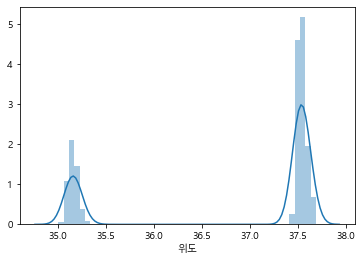

In [90]:
sns.distplot(df.위도)

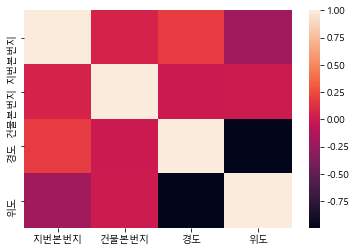

In [92]:
sns.heatmap(df.corr())

In [93]:
df.iloc[:,1].unique()

array(['음식', '생활서비스', '소매', '의료', '학문/교육', '관광/여가/오락', '부동산', '숙박', '스포츠'],
      dtype=object)

In [130]:
df.iloc[:,1].unique()

array(['음식', '생활서비스', '소매', '의료', '학문/교육', '관광/여가/오락', '부동산', '숙박', '스포츠'],
      dtype=object)

##### 대업종의 빈도수를 구해라

In [97]:
df.상권업종대분류명.value_counts()

음식          185516
소매          179460
생활서비스        97789
학문/교육        42477
의료           25509
부동산          20918
관광/여가/오락     16377
숙박            5327
스포츠            307
Name: 상권업종대분류명, dtype: int64

In [100]:
df_food = df[df.iloc[:,1] == '음식']

##### 강남구 음식점 출력

In [104]:
df[df.iloc[:,5] == '강남구']

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도
0,와라와라호프,음식,유흥주점,호프/맥주,서울특별시,강남구,대치1동,대치동,대지,604,서울특별시 강남구 대치동 604,서울특별시 강남구 남부순환로,2933,서울특별시 강남구 남부순환로 2933,127.061026,37.493922
1,커피빈코리아선릉로93길점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,역삼1동,역삼동,대지,696,서울특별시 강남구 역삼동 696-42,서울특별시 강남구 선릉로93길,6,서울특별시 강남구 선릉로93길 6,127.047883,37.505675
26,쉼터,음식,분식,라면김밥분식,서울특별시,강남구,삼성1동,삼성동,대지,159,서울특별시 강남구 삼성동 159,서울특별시 강남구 봉은사로,524,서울특별시 강남구 봉은사로 524,127.057100,37.512939
27,배제현의웰빙낙지한마리수제비,음식,일식/수산물,낙지/오징어,서울특별시,강남구,신사동,신사동,대지,512,서울특별시 강남구 신사동 512-13,서울특별시 강남구 강남대로152길,19,서울특별시 강남구 강남대로152길 19,127.020945,37.517574
38,타워광명내과의원,의료,병원,내과/외과,서울특별시,강남구,도곡2동,도곡동,대지,467,서울특별시 강남구 도곡동 467-14,서울특별시 강남구 언주로30길,39,서울특별시 강남구 언주로30길 39,127.053198,37.488742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573668,킹덤코리아,소매,음/식료품소매,청과물소매,서울특별시,강남구,역삼2동,역삼동,대지,720,서울특별시 강남구 역삼동 720-9,서울특별시 강남구 테헤란로38길,5,서울특별시 강남구 테헤란로38길 5,127.041635,37.501642
573672,심스틸러,소매,의복의류,캐쥬얼/스포츠의류,서울특별시,강남구,논현1동,논현동,대지,16,서울특별시 강남구 논현동 16-40,서울특별시 강남구 강남대로146길,7,서울특별시 강남구 강남대로146길 7,127.020698,37.514833
573673,밀리온골프,소매,의복의류,캐쥬얼/스포츠의류,서울특별시,강남구,압구정동,신사동,대지,648,서울특별시 강남구 신사동 648-8,서울특별시 강남구 도산대로49길,21,서울특별시 강남구 도산대로49길 21,127.036900,37.524247
573674,헤리티크뉴욕,소매,의복의류,예복/웨딩드레스,서울특별시,강남구,압구정동,신사동,대지,650,서울특별시 강남구 신사동 650-7,서울특별시 강남구 도산대로45길,16,서울특별시 강남구 도산대로45길 16-9,127.036036,37.523645


In [105]:
df[(df.iloc[:,5] == '강남구') & (df.iloc[:,1] == '음식')]

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도
0,와라와라호프,음식,유흥주점,호프/맥주,서울특별시,강남구,대치1동,대치동,대지,604,서울특별시 강남구 대치동 604,서울특별시 강남구 남부순환로,2933,서울특별시 강남구 남부순환로 2933,127.061026,37.493922
1,커피빈코리아선릉로93길점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,역삼1동,역삼동,대지,696,서울특별시 강남구 역삼동 696-42,서울특별시 강남구 선릉로93길,6,서울특별시 강남구 선릉로93길 6,127.047883,37.505675
26,쉼터,음식,분식,라면김밥분식,서울특별시,강남구,삼성1동,삼성동,대지,159,서울특별시 강남구 삼성동 159,서울특별시 강남구 봉은사로,524,서울특별시 강남구 봉은사로 524,127.057100,37.512939
27,배제현의웰빙낙지한마리수제비,음식,일식/수산물,낙지/오징어,서울특별시,강남구,신사동,신사동,대지,512,서울특별시 강남구 신사동 512-13,서울특별시 강남구 강남대로152길,19,서울특별시 강남구 강남대로152길 19,127.020945,37.517574
39,마깐바냑,음식,분식,라면김밥분식,서울특별시,강남구,역삼1동,역삼동,대지,831,서울특별시 강남구 역삼동 831-45,서울특별시 강남구 역삼로,109,서울특별시 강남구 역삼로 109,127.031005,37.493653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573504,강남농수산,음식,일식/수산물,음식점-일식,서울특별시,강남구,세곡동,율현동,대지,108,서울특별시 강남구 율현동 108-9,서울특별시 강남구 헌릉로745길,25,서울특별시 강남구 헌릉로745길 25,127.119159,37.469284
573521,풍,음식,일식/수산물,음식점-일식,서울특별시,강남구,논현1동,논현동,대지,183,서울특별시 강남구 논현동 183-4,서울특별시 강남구 강남대로118길,20,서울특별시 강남구 강남대로118길 20,127.025047,37.506579
573545,올드캡,음식,패스트푸드,패스트푸드,서울특별시,강남구,논현2동,논현동,대지,234,서울특별시 강남구 논현동 234-2,서울특별시 강남구 논현로114길,10,서울특별시 강남구 논현로114길 10,127.034194,37.508564
573554,흑화당,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,대치2동,대치동,대지,989,서울특별시 강남구 대치동 989,서울특별시 강남구 삼성로,238,서울특별시 강남구 삼성로 238,127.061386,37.498629


In [115]:
df_s_f = df[(df.iloc[:,4] == '서울특별시') & (df.iloc[:,1] == '음식')]
df_s_f.head(2)

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도
0,와라와라호프,음식,유흥주점,호프/맥주,서울특별시,강남구,대치1동,대치동,대지,604,서울특별시 강남구 대치동 604,서울특별시 강남구 남부순환로,2933,서울특별시 강남구 남부순환로 2933,127.061026,37.493922
1,커피빈코리아선릉로93길점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,역삼1동,역삼동,대지,696,서울특별시 강남구 역삼동 696-42,서울특별시 강남구 선릉로93길,6,서울특별시 강남구 선릉로93길 6,127.047883,37.505675


##### 서울시의 구별 각 중분류업종수를 출력

In [125]:
df_s_f.groupby(['시군구명','상권업종중분류명']).상호명.count().unstack()

상권업종중분류명,기타음식업,닭/오리요리,별식/퓨전요리,부페,분식,양식,유흥주점,음식배달서비스,일식/수산물,제과제빵떡케익,중식,커피점/카페,패스트푸드,한식
시군구명,,,,,,,,,,,,,,
강남구,47.0,539.0,341.0,63.0,1197.0,1573.0,1573.0,11.0,1255.0,650.0,358.0,2790.0,786.0,4371.0
강동구,4.0,318.0,138.0,24.0,509.0,154.0,737.0,4.0,379.0,223.0,93.0,584.0,224.0,1636.0
강북구,2.0,208.0,97.0,6.0,329.0,63.0,475.0,4.0,203.0,134.0,55.0,259.0,123.0,1209.0
강서구,16.0,323.0,145.0,21.0,531.0,260.0,869.0,2.0,441.0,256.0,126.0,765.0,259.0,1753.0
관악구,11.0,324.0,118.0,11.0,461.0,183.0,790.0,6.0,324.0,165.0,109.0,516.0,196.0,1336.0
광진구,11.0,453.0,188.0,25.0,655.0,275.0,1142.0,1.0,490.0,270.0,194.0,810.0,278.0,2020.0
구로구,6.0,289.0,121.0,23.0,429.0,97.0,691.0,6.0,282.0,169.0,226.0,551.0,180.0,1322.0
금천구,9.0,176.0,102.0,9.0,268.0,75.0,413.0,1.0,225.0,94.0,93.0,369.0,100.0,1003.0
노원구,10.0,345.0,99.0,12.0,476.0,132.0,482.0,6.0,300.0,239.0,95.0,547.0,259.0,1227.0


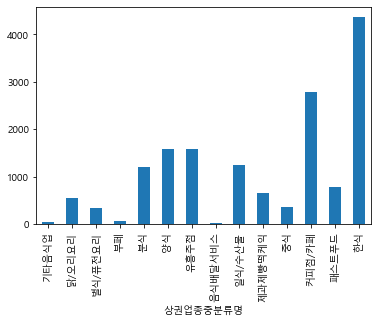

In [126]:
df_s_f.groupby(['시군구명','상권업종중분류명']).상호명.count().unstack().loc['강남구'].plot(kind='bar')

##### 서울에서 사교육이 발달된 위치

In [134]:
df.head(1)

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도
0,와라와라호프,음식,유흥주점,호프/맥주,서울특별시,강남구,대치1동,대치동,대지,604,서울특별시 강남구 대치동 604,서울특별시 강남구 남부순환로,2933,서울특별시 강남구 남부순환로 2933,127.061026,37.493922


In [138]:
df[(df.시도명 == '서울특별시') & (df.iloc[:,1] == '학문/교육')].시군구명.value_counts(ascending = False)[:5]

강남구    4005
서초구    2103
양천구    1881
광진구    1848
송파구    1797
Name: 시군구명, dtype: int64

##### 입시학원이 가장 많은 구

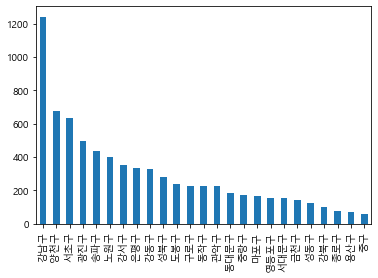

In [151]:
df[(df.iloc[:,3]=='학원-입시') & (df.시도명 == '서울특별시')].시군구명.value_counts(ascending = False).plot(kind='bar')

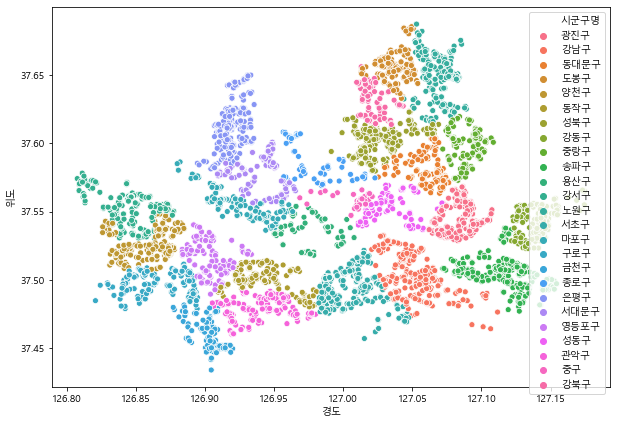

In [155]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=df[(df.iloc[:,3]=='학원-입시') & (df.시도명 == '서울특별시')],x='경도',y='위도',hue = '시군구명')

In [169]:
df.iloc[:,3].unique()

array(['호프/맥주', '커피전문점/카페/다방', '토스트전문', '사우나/증기탕/온천', '음식점-초밥전문',
       '라면김밥분식', '피자전문', '갈비/삼겹살', '한식/백반/한정식', '아구전문', '청과물소매', '도너츠전문',
       '건강원', '토산품/기념품점', '낙지/오징어', '정통양식/경양식', '중국음식/중국집', '종합소매',
       '바베큐전문', '내과/외과', '생식판매', '패스트푸드', '건강식품판매', '기타병원', '부대찌개/섞어찌개',
       '룸살롱/단란주점', '해장국/감자탕', '빠/카페/스탠드빠', '화장품판매점', '다이어트상품판매',
       '국수/만두/칼국수', '음식점-일식', '학원-외국어/어학', '한복/갈옷/민속옷', '기원', '식료품점',
       '아이스크림판매', '샤브샤브전문', '셔츠/내의/속옷', '학원-보석감정', '횟집', '독서실',
       '인테리어/욕실용품/커튼', '학원-국악', '노래방', '욕탕업-종합', '여성미용실', '소아과', '안경원',
       '홍어전문', '방앗간/정미소', '후라이드/양념치킨', '도시락전문점', '지도판매', '폐백전문', '남성미용실',
       '인쇄종합', '선물용품판매', '서예/서화/미술', '정형/성형외과', '태권도장', '종합이삿짐대행',
       '광고대행-전화번호부', '구내식당/자급식음식점', '부동산중개', '참치전문점', '한의원', '주유소',
       '셔터/새시판매', '어린이집', '배관난방보일러', '간판제작종합', '냉동식품판매', '철물/건설자재소매',
       '치과의원', '조명기구/전기용품', '일반병원', '사무/문구용품', '피아노/바이올린/기타', '약국', '렌트카',
       '자동차정비/카센타', '자동차부품판매', '중고자동차판매', '일반가구소매', '개인/가정용품수리-종합',
       '학원-입시', 'LPG판매', '

In [186]:
df_1000 = df[(df.시도명.str.contains('서울')) & (df.iloc[:,1]=='학문/교육')].상권업종소분류명.value_counts()[:8].index

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도
71,김극무영어,학문/교육,학원-어학,학원-외국어/어학,부산광역시,동래구,사직2동,사직동,대지,1017,부산광역시 동래구 사직동 1017,부산광역시 동래구 사직로,80,부산광역시 동래구 사직로 80,129.057535,35.196642
87,VIPO2독서실,학문/교육,도서관/독서실,독서실,부산광역시,금정구,남산동,남산동,대지,987,부산광역시 금정구 남산동 987-3,부산광역시 금정구 남산로,39,부산광역시 금정구 남산로 39,129.087912,35.266833
101,안재형영어,학문/교육,학원-어학,학원-외국어/어학,서울특별시,양천구,목5동,목동,대지,905,서울특별시 양천구 목동 905-34,서울특별시 양천구 목동서로,133,서울특별시 양천구 목동서로 133-2,126.875973,37.531592
121,정아트,학문/교육,학원-음악미술무용,서예/서화/미술,서울특별시,강서구,염창동,염창동,대지,184,서울특별시 강서구 염창동 184-8,서울특별시 강서구 양천로73가길,21,서울특별시 강서구 양천로73가길 21,126.873645,37.550924
134,아트인스튜디오,학문/교육,학원-음악미술무용,서예/서화/미술,서울특별시,강남구,역삼1동,역삼동,대지,818,서울특별시 강남구 역삼동 818-1,서울특별시 강남구 강남대로96길,12,서울특별시 강남구 강남대로96길 12,127.028054,37.499729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573654,골든벨독서실,학문/교육,도서관/독서실,독서실,서울특별시,양천구,신월2동,신월동,대지,447,서울특별시 양천구 신월동 447-5,서울특별시 양천구 월정로,56,서울특별시 양천구 월정로 56,126.841706,37.524719
573656,에이디링크연구소,학문/교육,학원기타,학원(종합),서울특별시,송파구,가락본동,가락동,대지,76,서울특별시 송파구 가락동 76,서울특별시 송파구 양재대로62길,47,서울특별시 송파구 양재대로62길 47,127.120757,37.495986
573657,한국비상영재교육,학문/교육,학원기타,학원(종합),부산광역시,서구,동대신1동,동대신동1가,대지,392,부산광역시 서구 동대신동1가 392-1,부산광역시 서구 구덕로,258,부산광역시 서구 구덕로 258,129.020431,35.107893
573661,도무스링구아,학문/교육,학원-보습교습입시,학원-입시,서울특별시,서초구,양재1동,우면동,대지,721,서울특별시 서초구 우면동 721-1,서울특별시 서초구 태봉로,70,서울특별시 서초구 태봉로 70,127.025571,37.464531


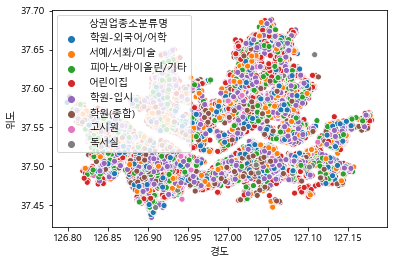

In [190]:
sns.scatterplot(data = df[(df.시도명.str.contains('서울')) & (df.상권업종소분류명.isin(df_1000))], x= '경도', y='위도',hue='상권업종소분류명')

### folium 활용

In [153]:
import folium

In [213]:
long = df[(df.시도명.str.contains('서울')) & (df.상권업종소분류명.isin(df_1000))].경도.mean()
lat = df[(df.시도명.str.contains('서울')) & (df.상권업종소분류명.isin(df_1000))].위도.mean()

In [223]:
m = folium.Map(location = [lat, long], zoom_start=15)
folium.Marker([lat, long],icon=folium.Icon(icon='star')).add_to(m)
m

In [240]:
df_s = df[(df.시도명.str.contains('서울')) & (df.상권업종소분류명.isin(['어린이집','학원-입시']))].sample(1000)
df_s.head(2)

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도
74257,독서문화연구원,학문/교육,학원-보습교습입시,학원-입시,서울특별시,강남구,대치2동,대치동,대지,994,서울특별시 강남구 대치동 994-9,서울특별시 강남구 영동대로,217,서울특별시 강남구 영동대로 217,127.068369,37.498143
296961,백상어린이집,학문/교육,유아교육,어린이집,서울특별시,관악구,서림동,신림동,대지,110,서울특별시 관악구 신림동 110-22,서울특별시 관악구 신림로28길,18,서울특별시 관악구 신림로28길 18,126.935027,37.473112


37.498143360931294

In [250]:
lat = df_s.위도.iloc[0]
long = df_s.경도.iloc[0]
title = df_s.상호명.iloc[0]
address = df_s.도로명주소.iloc[0]

In [262]:
m = folium.Map(location = [lat, long])
folium.Marker(location=[lat, long], tooltip=title, popup='<i>{}</i>'.format(address)).add_to(m)
m

In [263]:
m.save('index.html')

In [266]:
m = folium.Map(location=[lat, long])

for i in df_s.index[:100]:
    tooltip = df_s.loc[i,'상호명'] + "-" + df_s.loc[i, "도로명주소"]
    lat = df_s.loc[i, '위도']
    long = df_s.loc[i, '경도']    
    
    folium.Marker(location=[lat, long], tooltip=tooltip).add_to(m)

m

In [267]:
m = folium.Map(location=[lat, long],tiles = "Stamen Toner")

for i in df_s.index[:100]:
    tooltip = df_s.loc[i,'상호명'] + "-" + df_s.loc[i, "도로명주소"]
    lat = df_s.loc[i, '위도']
    long = df_s.loc[i, '경도']    
    
    folium.Marker(location=[lat, long], tooltip=tooltip).add_to(m)

m

In [268]:
m.save('index1.html')